In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
sns.set_theme(style="ticks", color_codes=True)

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
print(train.columns)
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
# Get categorical vs numeric columns
categorical_columns = train.loc[:, ~train.columns.isin(train.select_dtypes(include=np.number).columns.tolist())].columns.tolist()
numeric_columns = train.select_dtypes(include=np.number).columns.tolist()
 
print(categorical_columns)
print(numeric_columns)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

In [8]:
train_features = train.iloc[:, 1:]

for column in train_features.columns:
    print("{} {}".format(column, train_features[column].isna().sum()))

MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSold 0
S

In [9]:
for column in categorical_columns:
    train_features[column] = train_features[column].fillna("NaN")

for column in train_features.columns:
    print("{} {}".format(column, train_features[column].isna().sum()))

MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 0
GarageType 0
GarageYrBlt 81
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 0
Fence 0
MiscFeature 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition

In [10]:
train_features = train_features.dropna(axis=0)

for column in train_features.columns:
    print("{} {}".format(column, train_features[column].isna().sum()))

MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
Alley 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 0
Fence 0
MiscFeature 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0


In [11]:
train_target = train_features.iloc[:, -1]
train_features = train_features.drop("SalePrice", axis=1)

In [12]:
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()

for column in categorical_columns:
    train_features[column+"_labels"] = label_enc.fit_transform(train_features[column]).reshape((-1,1))

train_features = train_features.drop(categorical_columns, axis=1)


In [13]:
print(train_features.shape)
print(train_features.columns)
train_features.head()

(1121, 79)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_labels', 'Street_labels', 'Alley_labels',
       'LotShape_labels', 'LandContour_labels', 'Utilities_labels',
       'LotConfig_labels', 'LandSlope_labels', 'Neighborhood_labels',
       'Condition1_labels', 'Condition2_labels', 'BldgType_labels',
       'HouseStyle_labels', 'RoofStyle_labels', 'RoofMatl_labels',
       'Exterior1st_labels', 'Exterior2nd_labels', 'MasVnrType_labels',
       'ExterQual_labels', 'ExterCon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_labels,GarageFinish_labels,GarageQual_labels,GarageCond_labels,PavedDrive_labels,PoolQC_labels,Fence_labels,MiscFeature_labels,SaleType_labels,SaleCondition_labels
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,1,4,4,2,3,4,0,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,1,4,4,2,3,4,0,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,1,4,4,2,3,4,0,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,5,2,4,4,2,3,4,0,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,1,4,4,2,3,4,0,8,4


In [14]:
test_features = test.iloc[:, 1:]
for column in categorical_columns:
    test_features[column+"_labels"] = label_enc.fit_transform(test_features[column]).reshape((-1,1))

test_features = test_features.drop(categorical_columns, axis=1)

print(test_features.shape)
print(test_features.columns)
test_features.head()

(1459, 79)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_labels', 'Street_labels', 'Alley_labels',
       'LotShape_labels', 'LandContour_labels', 'Utilities_labels',
       'LotConfig_labels', 'LandSlope_labels', 'Neighborhood_labels',
       'Condition1_labels', 'Condition2_labels', 'BldgType_labels',
       'HouseStyle_labels', 'RoofStyle_labels', 'RoofMatl_labels',
       'Exterior1st_labels', 'Exterior2nd_labels', 'MasVnrType_labels',
       'ExterQual_labels', 'ExterCon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_labels,GarageFinish_labels,GarageQual_labels,GarageCond_labels,PavedDrive_labels,PoolQC_labels,Fence_labels,MiscFeature_labels,SaleType_labels,SaleCondition_labels
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,2,3,4,2,2,2,3,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,2,3,4,2,2,4,0,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,0,3,4,2,2,2,3,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,0,3,4,2,2,4,3,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,1,3,4,2,2,4,3,8,4


In [15]:
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

Diff(test_features.columns, train_features.columns)

[]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=0)

In [26]:
from sklearn import ensemble

rfr = ensemble.RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))


0.706806780459937
0.6529328088938768


In [90]:
import sklearn.model_selection as ms

grid_para_forest = {
    #'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 1),
}

grid_search_forest = ms.GridSearchCV(rfr, grid_para_forest, cv=3, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [31]:
grid_search_forest.best_estimator_.score(X_test, y_test)

0.8225936550041744

## Gradient Boosting Model

In [37]:
gbr = ensemble.GradientBoostingRegressor()
gbr.set_params(verbose=1)

GradientBoostingRegressor(verbose=1)

In [39]:
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1  6114622253.7641            1.17s
         2  5272048391.1293            0.93s
         3  4564405154.2806            0.86s
         4  3980221021.6748            0.84s
         5  3486034020.6229            0.76s
         6  3066752881.8237            0.75s
         7  2722662730.3114            0.71s
         8  2424562894.2098            0.67s
         9  2153828428.4675            0.64s
        10  1933746088.7583            0.63s
        20   814101527.6932            0.46s
        30   489829826.8112            0.37s
        40   366102494.5468            0.30s
        50   298379373.9355            0.25s
        60   255713616.6856            0.20s
        70   232818870.1101            0.14s
        80   215492361.7044            0.10s
        90   192219387.7852            0.05s
       100   173391399.2459            0.00s
0.9757576795134666
0.8842350690280057


In [48]:
def tune_gbm(X, y, learning_rate, max_depth, n_estimators=10000):
    gbm = ensemble.GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    gbm.fit(X, y)
    
    return gbm


def demo_gbm_tuning(model, X_train, X_test, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(X_train)
    gen_test  = model.staged_predict(X_test)

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, Y_train_reg))
        testMSE.append(mean_squared_error(y_pred_test, Y_test_reg))
    
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end])
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end])

The best test score is 621213428.85 at the step 100
The best r2 test score is 0.8925113342750215 at the step 100
--------------------------------------------------


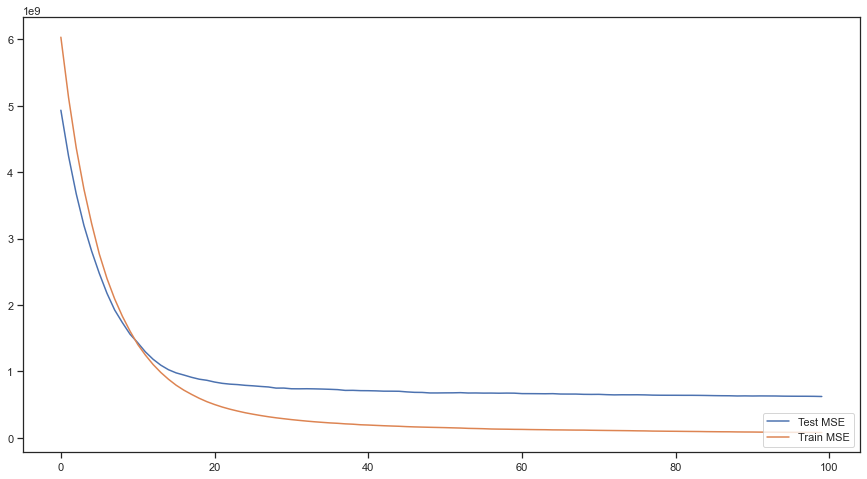

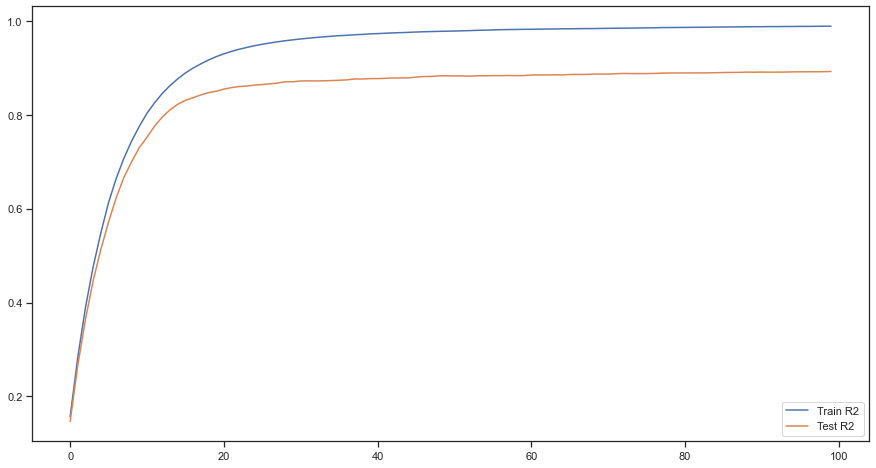

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

learning_rate=.1
max_depth=4
n_estimators = 100

start=0
n_estimators=100

gbr_lr001_md4 = ensemble.GradientBoostingRegressor(
    learning_rate=learning_rate, 
    n_estimators=n_estimators, 
    max_depth=max_depth)

gbr_lr001_md4.fit(X_train, y_train)

gen_train = gbr_lr001_md4.staged_predict(X_train)
gen_test  = gbr_lr001_md4.staged_predict(X_test)

trainMSE = []
testMSE  = []
trainr2 = []
testr2 = []
steps   = range(1,n_estimators+1)
for n in steps:
    y_pred_train = next(gen_train)
    y_pred_test  = next(gen_test)
    trainMSE.append(mean_squared_error(y_pred_train, y_train))
    testMSE.append(mean_squared_error(y_pred_test, y_test))
    trainr2.append(r2_score(y_train, y_pred_train))
    testr2.append(r2_score(y_test, y_pred_test))

print("The best test score is {:.2f} at the step {}".format(
    min(testMSE), np.argmin(testMSE)+1))
print("The best r2 test score is {} at the step {}".format(
    max(testr2), np.argmax(testr2)+1))
print('-'*50)
plt.figure(0)
plt.plot(range(start, end), testMSE[start:end], label="Test MSE")
plt.plot(range(start, end), trainMSE[start:end], label="Train MSE")
plt.legend(loc=4)

plt.figure(1)
plt.plot(range(start, end), trainr2[start:end], label="Train R2")
plt.plot(range(start, end), testr2[start:end], label="Test R2")
plt.legend(loc=4)

# gbr_lr001_md4.fit(X_train, y_train)
# print(gbr_lr001_md4.score(X_train, y_train))
# print(gbr_lr001_md4.score(X_test, y_test))

In [93]:
import sklearn.model_selection as ms

grid_para_gbr = {
    #'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(0, 25, 2),
    'learning_rate': [.1, .01, .001, .0001]
}

grid_search_gbr = ms.GridSearchCV(gbr, grid_para_gbr, cv=3, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)



CPU times: user 27.3 s, sys: 2.61 s, total: 29.9 s
Wall time: 52min 37s
{'max_depth': 17, 'n_estimators': 17}
0.8462550689567854


In [94]:
from joblib import dump, load
dump(grid_para_gbr, 'grid_para_gbr.joblib') 
dump(rfr, 'rfr.joblib')
dump(gbm, 'gbm.joblib')
dump(gbr, 'gbr.joblib')
dump(gbr_lr001_md4, 'gbr_lr001_md4.joblib')

['gbr_lr001_md4.joblib']